In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
df_churn=pd.read_csv("churn.csv")

In [660]:
df_churn.columns

Index(['Unnamed: 0', 'State', 'Account Length', 'Area Code', 'Phone',
       'Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [661]:
df_churn[df_churn['CustServ Calls']==-1]

Empty DataFrame
Columns: [Unnamed: 0, State, Account Length, Area Code, Phone, Int'l Plan, VMail Plan, VMail Message, Day Mins, Day Calls, Day Charge, Eve Mins, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, Intl Mins, Intl Calls, Intl Charge, CustServ Calls, Churn?]
Index: []

In [0]:
df_churn=df_churn.rename(columns={"Int'l Plan": "Intl_Plan"})

Encode the text categorical text into numeric format

In [0]:
from sklearn import preprocessing

In [0]:
le = preprocessing.LabelEncoder()


In [0]:
df_churn["State"]=le.fit_transform(df_churn["State"])

In [666]:
df_churn.head()

Unnamed: 0  State  Account Length  ... Intl Charge CustServ Calls  Churn?
0           0     16             128  ...         2.7              1  False.
1           1     35             107  ...         3.7              1  False.
2           2     31             137  ...        3.29              0  False.
3           3     35              84  ...        1.78              2  False.
4           4     36              75  ...        2.73              3  False.

[5 rows x 22 columns]

Intially we replace all question marks with -1 just for temporary purpose.

In [0]:
df_churn.replace(('yes', 'no','?'), (1, 0,-1), inplace=True)

In [0]:
df_churn.replace(('True.', 'False.'), (1, 0), inplace=True)

As we can seebelow the phone number is unique so we can drop the number.

In [669]:
len(np.unique(df_churn["Phone"]))

3333

In [670]:
df_churn.shape

(3333, 22)

In [671]:
df_churn.head()

Unnamed: 0  State  Account Length  ... Intl Charge CustServ Calls  Churn?
0           0     16             128  ...         2.7              1       0
1           1     35             107  ...         3.7              1       0
2           2     31             137  ...        3.29              0       0
3           3     35              84  ...        1.78              2       0
4           4     36              75  ...        2.73              3       0

[5 rows x 22 columns]

In [672]:
np.unique(df_churn["Churn?"])

array([0, 1])

In [0]:
list_cat_columns = ["Unnamed: 0","Phone"]
df_churn_sub=df_churn.drop(list_cat_columns,axis=1)

In [674]:
df_churn_sub.head()

State  Account Length Area Code  ...  Intl Charge  CustServ Calls  Churn?
0     16             128       415  ...          2.7               1       0
1     35             107       415  ...          3.7               1       0
2     31             137       415  ...         3.29               0       0
3     35              84       408  ...         1.78               2       0
4     36              75       415  ...         2.73               3       0

[5 rows x 20 columns]

In [0]:
Y=df_churn_sub["Churn?"]

In [0]:
#churn_data_frame= df_churn_sub.drop(["Churn?"],axis=1)

In [0]:
churn_data_frame=df_churn_sub

In [678]:
churn_data_frame.shape

(3333, 20)

This **multi_regressor_fitter** will be resposible predicting the missing value it check weather the values are missing are not and fit it is it will try to predict the missing vales.Here we used multivariable linear regression for this.

In [0]:
def multi_regressor_fitter(data_cols,predict_columnname,type_col):
  for_pred=data_cols[data_cols[predict_columnname]==-1]
  for_pred=for_pred.drop([predict_columnname],axis=1)
  data_col=data_cols[data_cols[predict_columnname]!=-1]
  if len(data_cols)!=len(data_col):
    y=data_col[predict_columnname]
    x=data_col.drop([predict_columnname],axis=1)
    m_reg=LinearRegression()
    m_reg.fit(x,y)
    print(for_pred.iloc[0].shape)
    #fresh =np.reshape(for_pred.iloc,(1,19))
    res=m_reg.predict(for_pred)
    print("----------------------------------")
    if type_col=="numeric":
      res = [round(x) for x in res]
      for_pred[predict_columnname]=res
      print("Pred Frame Shape")
      print(for_pred.shape)
      print("Data Col Shape")
      print(data_col.shape)
      cobi=[for_pred,data_col]
      mframe=pd.concat(cobi)
      print("Overall")
      print(mframe.shape)
      return mframe
  else:
    print("Everthing is present")
    return data_cols

In [680]:
churn_data_frame.columns

Index(['State', 'Account Length', 'Area Code', 'Intl_Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'],
      dtype='object')

In the following code below we will try to check if the value is missing or not and if it it will try to predict that.

In [0]:
from sklearn.linear_model import LinearRegression

In [682]:
churn_data_frame_e= multi_regressor_fitter(churn_data_frame,"Account Length","numeric")
#churn_data_frame_e= multi_regressor_fitter(churn_data_frame,"VMail Plan","numeric")

Everthing is present


In [683]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_e,"State","numeric")

Everthing is present


In [684]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Area Code","numeric")

(19,)
----------------------------------
Pred Frame Shape
(173, 20)
Data Col Shape
(3160, 20)
Overall
(3333, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [685]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Intl_Plan","numeric")

(19,)
----------------------------------
Pred Frame Shape
(528, 20)
Data Col Shape
(2805, 20)
Overall
(3333, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [686]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"VMail Plan","numeric")

(19,)
----------------------------------
Pred Frame Shape
(349, 20)
Data Col Shape
(2984, 20)
Overall
(3333, 20)


In [687]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Day Mins","numeric")

Everthing is present


In [688]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Day Calls","numeric")

Everthing is present


In [689]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Day Charge","numeric")

(19,)
----------------------------------
Pred Frame Shape
(112, 20)
Data Col Shape
(3221, 20)
Overall
(3333, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [690]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Eve Mins","numeric")

(19,)
----------------------------------
Pred Frame Shape
(88, 20)
Data Col Shape
(3245, 20)
Overall
(3333, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [691]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Eve Charge","numeric")

Everthing is present


Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls'],

In [692]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Night Mins","numeric")

Everthing is present


In [693]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Night Calls","numeric")

Everthing is present


In [694]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Night Charge","numeric")

(19,)
----------------------------------
Pred Frame Shape
(310, 20)
Data Col Shape
(3023, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Overall
(3333, 20)


In [695]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Intl Mins","numeric")

Everthing is present


In [696]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Intl Calls","numeric")

(19,)
----------------------------------
Pred Frame Shape
(662, 20)
Data Col Shape
(2671, 20)
Overall
(3333, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [697]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Intl Charge","numeric")

(19,)
----------------------------------
Pred Frame Shape
(352, 20)
Data Col Shape
(2981, 20)
Overall
(3333, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [698]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"CustServ Calls","numeric")

Everthing is present


In [699]:
churn_data_frame_st= multi_regressor_fitter(churn_data_frame_st,"Eve Calls","numeric")

(19,)
----------------------------------
Pred Frame Shape
(520, 20)
Data Col Shape
(2813, 20)
Overall
(3333, 20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [700]:
churn_data_frame_st.head()

Account Length Area Code  Churn?  ...  State  VMail Message VMail Plan
1900             113       438       0  ...     46              0        0.0
285              145       408       0  ...     41             24        1.0
823               77       510       0  ...     38             24        1.0
1972             124       415       0  ...     28              0        0.0
3058             112       439       0  ...      1              0        0.0

[5 rows x 20 columns]

In [701]:
np.unique(churn_data_frame_st["Intl_Plan"])

array([0., 1.])

In [702]:
churn_data_frame.head()

State  Account Length Area Code  ...  Intl Charge  CustServ Calls  Churn?
0     16             128       415  ...          2.7               1       0
1     35             107       415  ...          3.7               1       0
2     31             137       415  ...         3.29               0       0
3     35              84       408  ...         1.78               2       0
4     36              75       415  ...         2.73               3       0

[5 rows x 20 columns]

In [703]:
churn_data_frame_st1 = churn_data_frame_st.convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [0]:
for col in churn_data_frame_st1.columns:
  if churn_data_frame_st1[col].isna().values.any()==True:
    print(col)
    print(churn_data_frame_st1[col].isna().values.any())

In [705]:
churn_data_frame_st.columns

Index(['Account Length', 'Area Code', 'Churn?', 'CustServ Calls', 'Day Calls',
       'Day Charge', 'Day Mins', 'Eve Calls', 'Eve Charge', 'Eve Mins',
       'Intl Calls', 'Intl Charge', 'Intl Mins', 'Intl_Plan', 'Night Calls',
       'Night Charge', 'Night Mins', 'State', 'VMail Message', 'VMail Plan'],
      dtype='object')

Check if any column is null or not

In [706]:
for col in churn_data_frame_st.columns:
  print (churn_data_frame_st[pd.to_numeric(churn_data_frame_st[col], errors='coerce').isnull()==True])

Empty DataFrame
Columns: [Account Length, Area Code, Churn?, CustServ Calls, Day Calls, Day Charge, Day Mins, Eve Calls, Eve Charge, Eve Mins, Intl Calls, Intl Charge, Intl Mins, Intl_Plan, Night Calls, Night Charge, Night Mins, State, VMail Message, VMail Plan]
Index: []
Empty DataFrame
Columns: [Account Length, Area Code, Churn?, CustServ Calls, Day Calls, Day Charge, Day Mins, Eve Calls, Eve Charge, Eve Mins, Intl Calls, Intl Charge, Intl Mins, Intl_Plan, Night Calls, Night Charge, Night Mins, State, VMail Message, VMail Plan]
Index: []
Empty DataFrame
Columns: [Account Length, Area Code, Churn?, CustServ Calls, Day Calls, Day Charge, Day Mins, Eve Calls, Eve Charge, Eve Mins, Intl Calls, Intl Charge, Intl Mins, Intl_Plan, Night Calls, Night Charge, Night Mins, State, VMail Message, VMail Plan]
Index: []
Empty DataFrame
Columns: [Account Length, Area Code, Churn?, CustServ Calls, Day Calls, Day Charge, Day Mins, Eve Calls, Eve Charge, Eve Mins, Intl Calls, Intl Charge, Intl Mins, In

In [0]:
churn_data_frame=churn_data_frame[churn_data_frame["Account Length"]==-1]

In [708]:
churn_data_frame_e.shape

(3333, 20)

In [0]:
import seaborn as sns

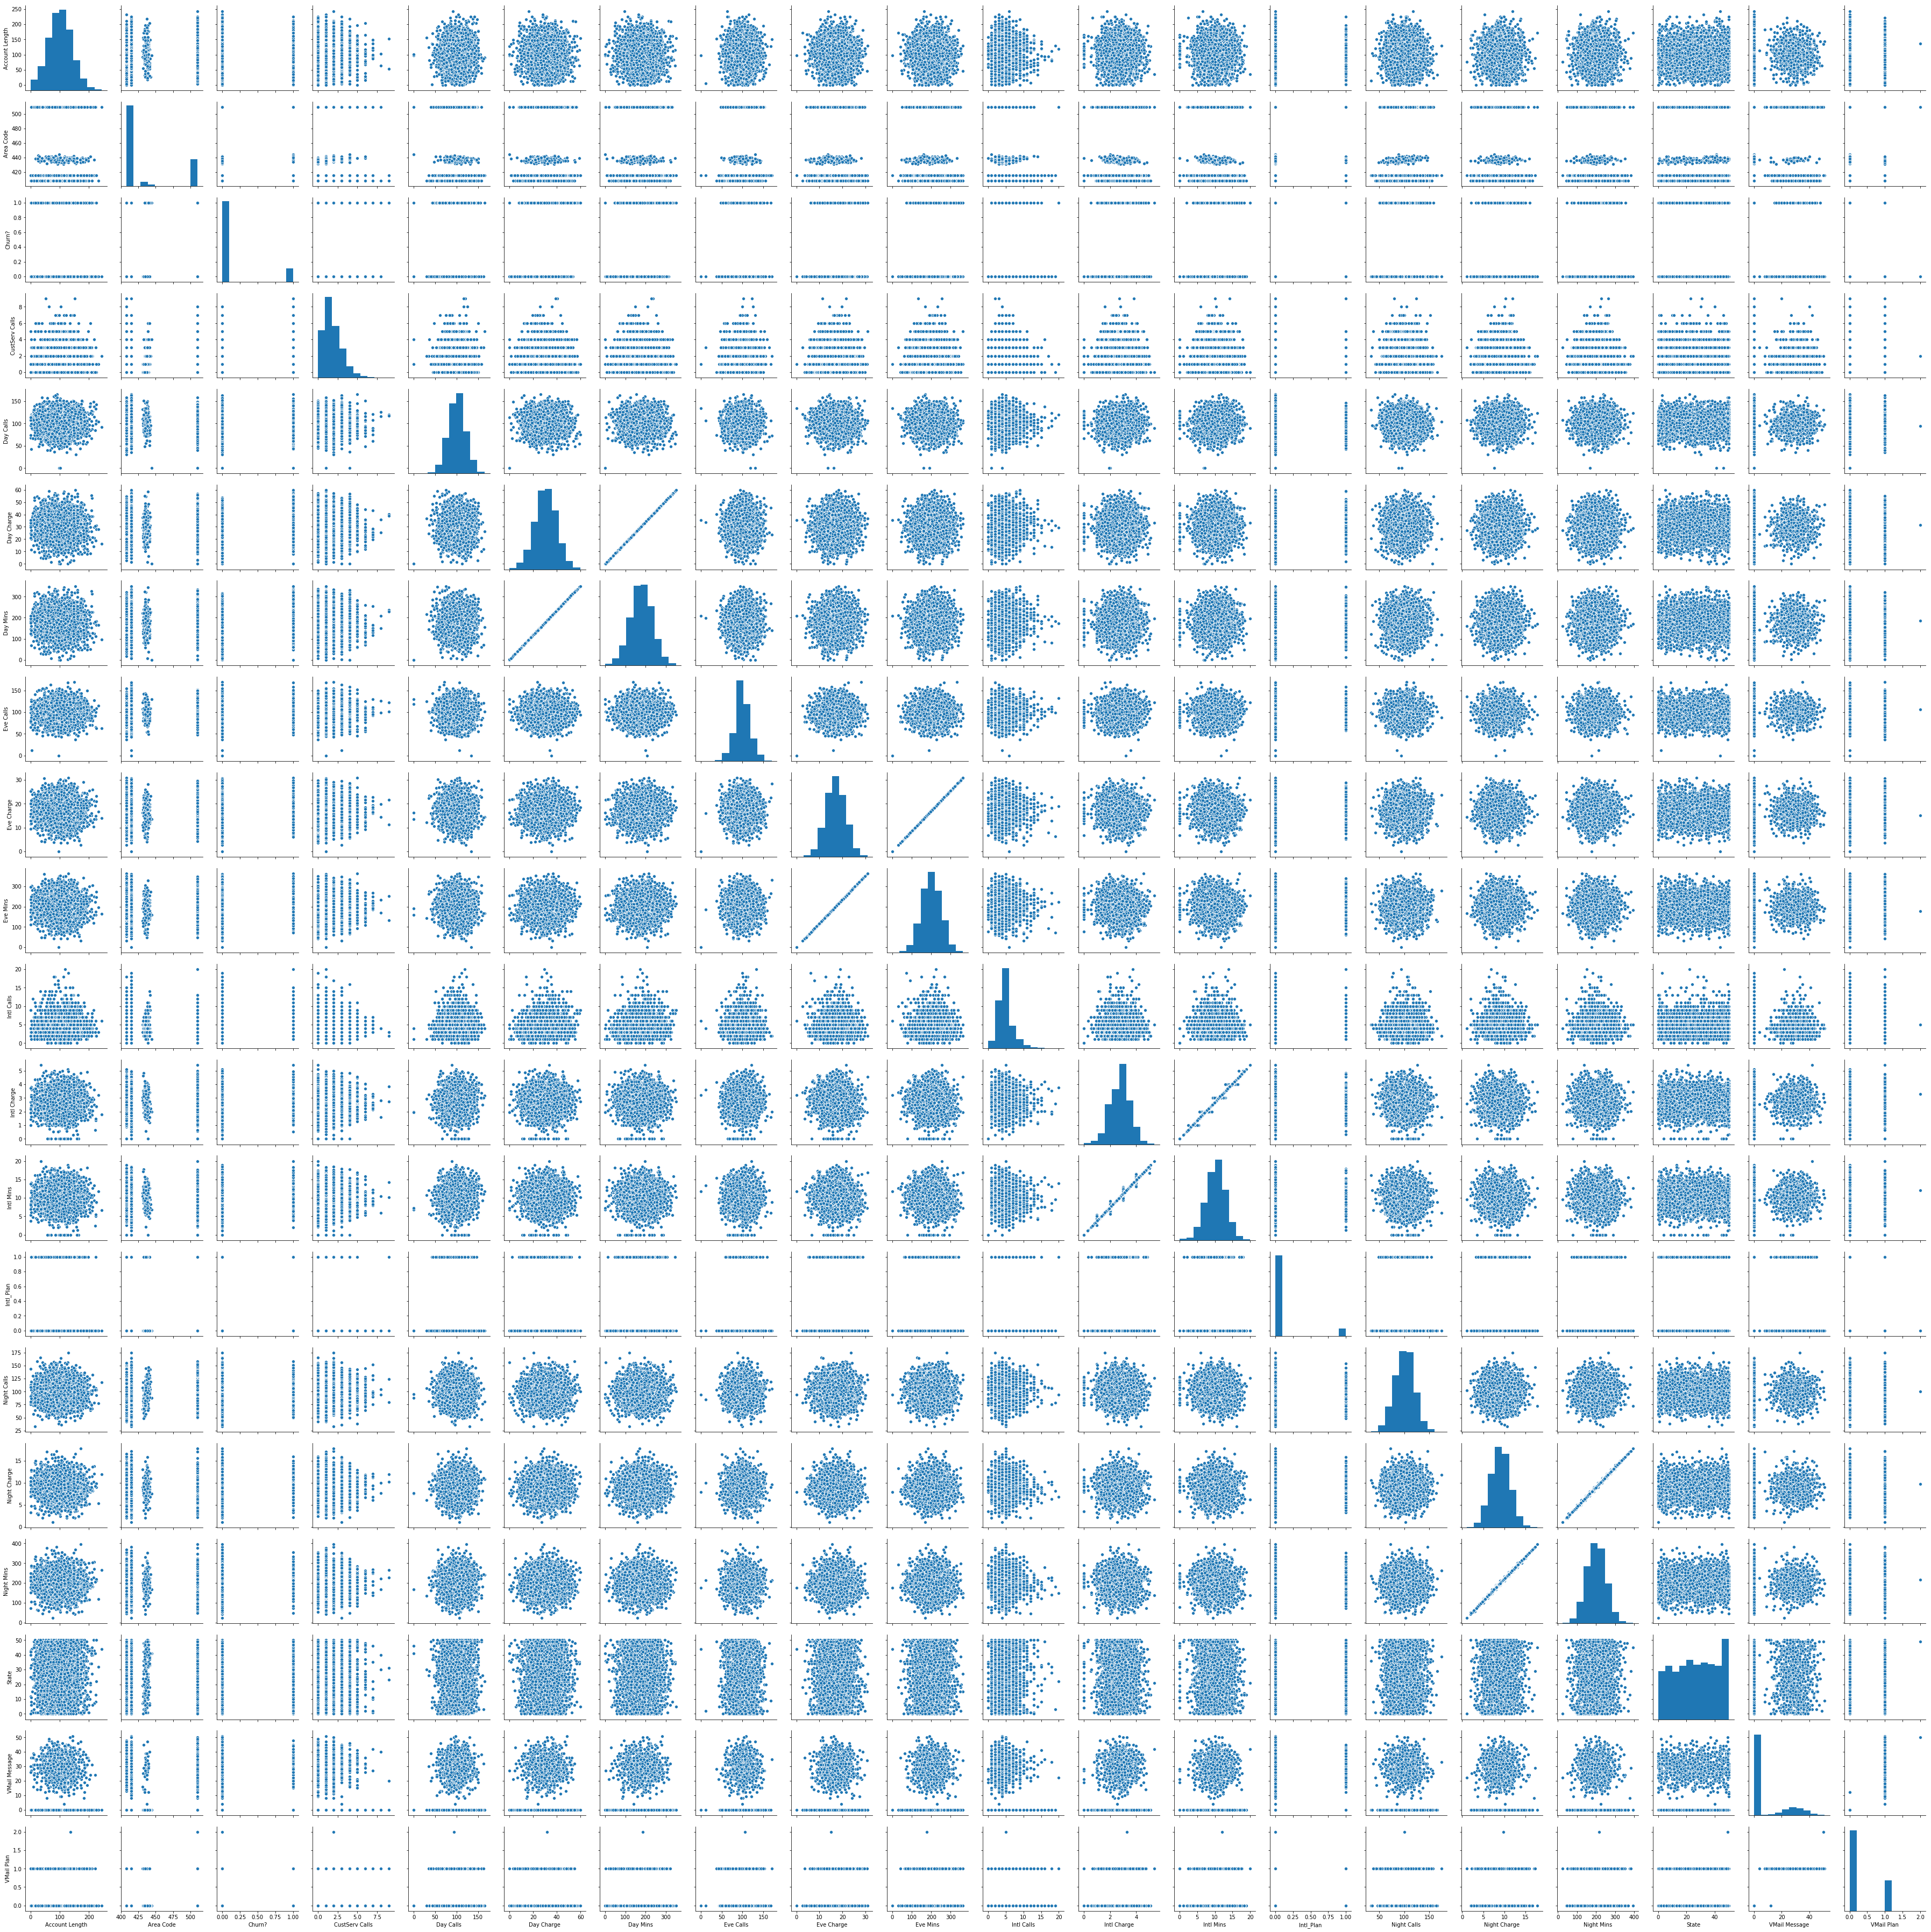

In [710]:
sns.pairplot(churn_data_frame_st1)

Visulization of the balancing feature.

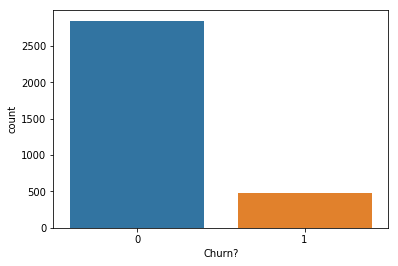

In [711]:
ax = sns.countplot(x="Churn?", data=churn_data_frame_st1)

As we can see the data is highly imblanced to solve this problem we will be using over sampling

In [0]:
churn_data_frame_samp1=churn_data_frame_st1[churn_data_frame_st1["Churn?"]==1]


In [713]:
churn_data_frame_samp1.head()

Account Length  Area Code  Churn?  ...  State  VMail Message  VMail Plan
894               97      510.0       1  ...     21              0         0.0
871               98      510.0       1  ...     19              0         0.0
2594             115      439.0       1  ...     35              0         0.0
1768             115      510.0       1  ...     23              0         0.0
2432              75      510.0       1  ...     38              0         0.0

[5 rows x 20 columns]

In [714]:
churn_data_frame_st1.shape

(3333, 20)

In [715]:
churn_data_frame_samp3.shape

(483, 20)

We seprate out the churn and not churn frame.Then subset the  frane then cocatenate the same with charn frame 

In [0]:
churn_data_frame_index = churn_data_frame_overall[churn_data_frame_overall["Churn?"] == 0].index

In [0]:
select_index_train=churn_data_frame_index[:1500]

In [0]:
churn_data_frame_st_usample=churn_data_frame_st1.drop(select_index_train)

In [719]:
churn_data_frame_st_usample.shape

(1983, 20)

In [0]:
under_sample = churn_data_frame_overall.loc[select_index_train]

In [0]:
churn_data_frame_overall = pd.concat([under_sample,churn_data_frame_samp1,], axis=0)


In [722]:
churn_data_frame_overall.head()

Account Length  Area Code  Churn?  ...  State  VMail Message  VMail Plan
2473              66      408.0       0  ...      5             40         1.0
2519              15      415.0       0  ...     24              0         0.0
2520             123      408.0       0  ...      7             28         1.0
2532             174      415.0       0  ...     21              0         0.0
2561             143      510.0       0  ...     12             33         1.0

[5 rows x 20 columns]

In [0]:
need_frame=churn_data_frame_index[:800]

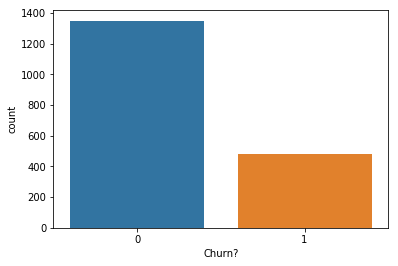

In [724]:
ax = sns.countplot(x="Churn?", data=churn_data_frame_overall)

In [0]:
churn_data_frame_overall.reset_index(drop=True, inplace=True)

In [726]:
churn_data_frame_overall.shape

(1833, 20)

In [0]:
y_label=churn_data_frame_overall["Churn?"]

In [728]:
len(y_label)

1833

In [729]:
churn_data_frame_overall.isna().any()

Account Length    False
Area Code         False
Churn?            False
CustServ Calls    False
Day Calls         False
Day Charge        False
Day Mins          False
Eve Calls         False
Eve Charge        False
Eve Mins          False
Intl Calls        False
Intl Charge       False
Intl Mins         False
Intl_Plan         False
Night Calls       False
Night Charge      False
Night Mins        False
State             False
VMail Message     False
VMail Plan        False
dtype: bool

In [0]:
churn_data_frame_train=churn_data_frame_overall.drop(["Churn?"],axis=1)

In [731]:
churn_data_frame_train.shape

(1833, 19)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
#y_label =[int(x) for x in df_churn_sub["churn"]]

In [0]:
#df_churn_sub=df_churn_sub.drop(["churn"],axis=1)

In [0]:
#df_churn_sub.head()

In [0]:
#from sklearn.model_selection import train_test_split

In [0]:
#np.unique(Y)

In [0]:
import xgboost as xgb

In [0]:
X_train=X_train.astype(float)

In [0]:
X_test=X_test.astype(float)

In [0]:
#xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 10, alpha = 10, n_estimators = 10)

In [0]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=150, colsample_bytree=0.8, 
                        subsample=0.9, nthread=10, learning_rate=0.2)

In [0]:
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
x=churn_data_frame_train.astype(float)
y=y_label.astype(float)

In [749]:
len(y_label)

1833

In [0]:
#x=churn_data_frame_samp1.astype(float)
#y=churn_data_frame_samp1["Churn?"]
#x=x.drop(["Churn?"],axis=1)

In [750]:
y.isna().any()

False

In [751]:
np.any(np.isnan(x))

False

In [0]:
y[894]

In [752]:
np.any(np.isfinite(y))

True

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [0]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

In [0]:
y.head()

In [0]:
from numpy import interp

StratifiedShuffleSplit use because the dataset was imbalanced so this function ensure the ratio of each class be same.

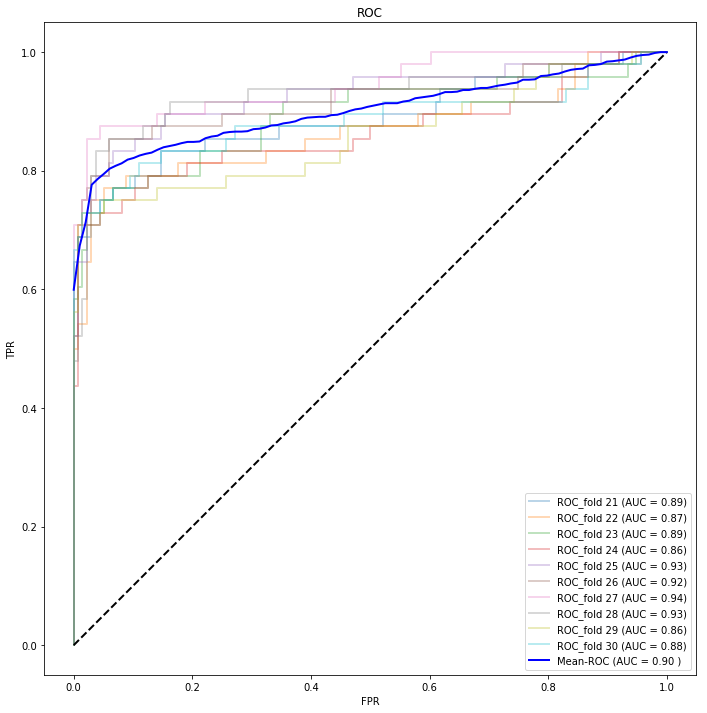

In [758]:
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
cv=StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=None)

for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC_fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean-ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()